In [1]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#tento radek potrebujeme pro korektni grafy
%matplotlib inline 

In [2]:
df=pd.read_excel('testovaci_dataset_BP.xlsx', sheet_name='Sheet1') 
df.sample(5) #vypisuje pocet random radku 

,Nazev,Soudni spory,Sidlo,Status,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Dlunzniky,Nespolehlivy platce,Pocet jednatelu
12,IBG ČESKO,2,"V Pískovně 2053 27801, KRALUPY NAD VLTAVOU",2,10,1,2,0,1,1,199,2,2,2,1
5,DITON s.r.o.,2,"Čeperka 222 53345, Opatovice nad Labem",2,22,2,7,0,1,1,499,1,2,2,2
10,"FAINSTAV, s.r.o.",1,"J.E. Purkyně č.p. 365 (areál nemocnice) 68601,...",2,21,2,9,0,1,1,19,2,2,2,2
9,BUDOVA 13,2,"Vavrečkova 7074 76001, ZLÍN",2,16,2,19,1,1,2,5,2,2,2,2
4,Badec Store s.r.o.,2,"Kuklenská 4396/46 61500, Brno - Židenice",2,2,2,9,0,2,1,5,2,2,2,3


In [3]:
df.info() # informace o sloupcich a promenych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Nazev                     24 non-null     object
 1   Soudni spory              24 non-null     int64 
 2   Sidlo                     24 non-null     object
 3   Status                    24 non-null     int64 
 4   Pocet let na trhu         24 non-null     int64 
 5   Rust zak. kapitalu        24 non-null     int64 
 6   Pocet jinych subjektu     24 non-null     int64 
 7   Jine subjekty v lividace  24 non-null     int64 
 8   Status domeny             24 non-null     int64 
 9   Pravni forma              24 non-null     int64 
 10  Pocet zamestnancu         24 non-null     int64 
 11  Rust poctu zam.           24 non-null     int64 
 12  Dlunzniky                 24 non-null     int64 
 13  Nespolehlivy platce       24 non-null     int64 
 14  Pocet jednatelu           24

In [4]:
df.describe() # statistika sloupců s kvantitativními proměnnými

,Soudni spory,Status,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Dlunzniky,Nespolehlivy platce,Pocet jednatelu
count,24.000000,24.0,24.000000,24.000000,24.000000,24.00000,24.000000,24.00000,24.000000,24.000000,24.0,24.0,24.000000
mean,1.750000,2.0,17.666667,1.625000,7.625000,0.25000,1.041667,1.25000,962.625000,1.875000,2.0,2.0,2.416667
std,0.442326,0.0,7.648056,0.494535,9.272739,0.53161,0.204124,0.53161,2794.157815,0.337832,0.0,0.0,1.585715
min,1.000000,2.0,2.000000,1.000000,0.000000,0.00000,1.000000,1.00000,5.000000,1.000000,2.0,2.0,1.000000
25%,1.750000,2.0,12.750000,1.000000,1.750000,0.00000,1.000000,1.00000,8.000000,2.000000,2.0,2.0,1.000000
50%,2.000000,2.0,19.500000,2.000000,4.000000,0.00000,1.000000,1.00000,19.000000,2.000000,2.0,2.0,2.000000
75%,2.000000,2.0,22.000000,2.000000,9.000000,0.00000,1.000000,1.00000,274.000000,2.000000,2.0,2.0,3.250000
max,2.000000,2.0,29.000000,2.000000,38.000000,2.00000,2.000000,3.00000,10000.000000,2.000000,2.0,2.0,6.000000


In [5]:
df.columns # dolu vypisuje seznam spoupcu

Index(['Nazev ', 'Soudni spory', 'Sidlo', 'Status', 'Pocet let na trhu',
       'Rust zak. kapitalu', 'Pocet jinych subjektu',
       'Jine subjekty v lividace', 'Status domeny', 'Pravni forma',
       'Pocet zamestnancu', 'Rust poctu zam.', 'Dlunzniky',
       'Nespolehlivy platce', 'Pocet jednatelu'],
      dtype='object')

In [47]:
col=['Soudni spory', 'Pocet let na trhu',
       'Rust zak. kapitalu', 'Pocet jinych subjektu',
       'Jine subjekty v lividace', 'Status domeny', 'Pravni forma',
       'Pocet zamestnancu', 'Rust poctu zam.', 'Pocet jednatelu'] # !!!!!! kvantitativní (int, float) sloupce, 
#                                       na zaklade kterych bude provedena klasterizace

In [48]:
pd.options.mode.chained_assignment = None 
df[col].fillna(0, inplace=True) # nahradim chybějící data nulami, jinak dojde k chybě

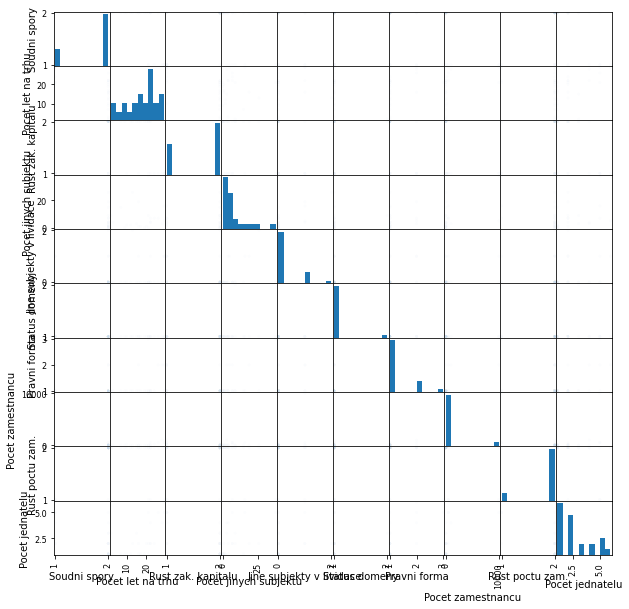

In [49]:
# rozptylová matice a histogramy
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.01, figsize=(10, 10));

In [50]:
df[col].corr() # podívame se na párové korelace

,Soudni spory,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Pocet jednatelu
Soudni spory,1.000000,-0.591203,0.546594,-0.341863,-0.092450,0.120386,-0.462250,-0.560721,0.363696,-0.588882
Pocet let na trhu,-0.591203,1.000000,-0.528788,0.028201,0.171099,-0.436318,0.374280,0.342553,-0.319723,0.610655
Rust zak. kapitalu,0.546594,-0.528788,1.000000,-0.136293,-0.124035,0.161515,-0.454794,-0.433375,0.227710,-0.512851
Pocet jinych subjektu,-0.341863,0.028201,-0.136293,1.000000,0.443208,0.031584,0.566689,0.461546,-0.529143,0.377746
Jine subjekty v lividace,-0.092450,0.171099,-0.124035,0.443208,1.000000,-0.100167,0.076923,0.140183,-0.060523,0.232096
Status domeny,0.120386,-0.436318,0.161515,0.031584,-0.100167,1.000000,-0.100167,-0.073000,0.078811,0.078355
Pravni forma,-0.462250,0.374280,-0.454794,0.566689,0.076923,-0.100167,1.000000,0.753017,-0.302614,0.644710
Pocet zamestnancu,-0.560721,0.342553,-0.433375,0.461546,0.140183,-0.073000,0.753017,1.000000,-0.373549,0.639051
Rust poctu zam.,0.363696,-0.319723,0.227710,-0.529143,-0.060523,0.078811,-0.302614,-0.373549,1.000000,-0.385514
Pocet jednatelu,-0.588882,0.610655,-0.512851,0.377746,0.232096,0.078355,0.644710,0.639051,-0.385514,1.000000


In [51]:
# načítam knihovnu předzpracování dat
# tato knihovna automaticky převádí data na normální hodnoty
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [52]:
#Pojďme vypočítat vzdálenosti mezi každou datovou sadou,
#to znamená řetězci pole data_for_clust. Vypočítá se euklidovská vzdálenost (výchozí).
data_dist = pdist(dataNorm, 'euclidean')
#Hlavní funkce hierarchického shlukování
#Kombinování prvků do klastrů a ukládání do
#speciální proměnné (používá se níže pro vykreslení
# a zvýraznění počtu klastrů
data_linkage = linkage(data_dist, method='average')

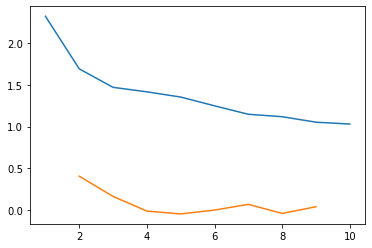

Doporučený počet clusteru: 2


In [54]:
# Loketní metoda. Umožňuje odhadnout optimální počet segmentů.
# Zobrazuje součet variací v rámci skupiny
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Doporučený počet clusteru:", k)

In [55]:
#funkce vykreslování dendrogramu
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [64]:
# !!!!!!!!!Predpokladany pocet klasteru!!!!!!
nClust=8

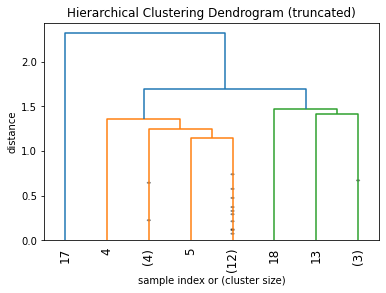

In [65]:
#budování dendrogramu
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [67]:
# hierarchické shlukování
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 5, 1, 2, 4, 3, 1, 2, 1, 2, 5, 2, 1, 6, 2, 2, 5, 8, 7, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
col

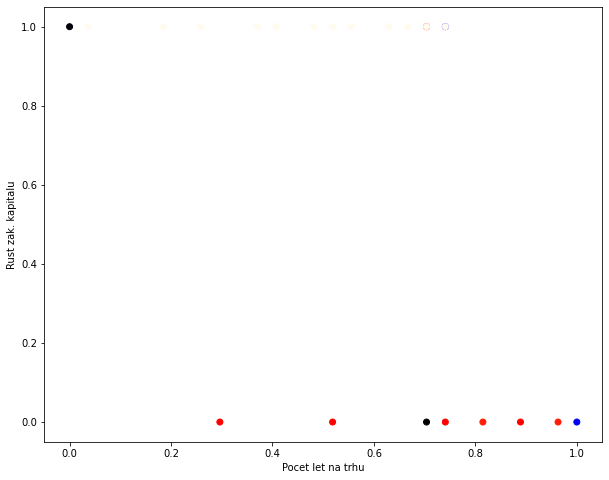

In [68]:
x=1 # budovani diagramu. Ruzne osi(zmena cisla sloupcu)
y=2 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [69]:
# pridavame cislo clusteru k puvodnim datum
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Pocet']=df.groupby('I').size().values
res #dole sredni hodnoty v clusteru a pocet objektu

,Soudni spory,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Pocet jednatelu,Pocet
I,,,,,,,,,,,
1,2.0,18.500000,1.000000,3.500000,0.25,1.0,1.250000,185.250000,2.0,2.250000,4
2,2.0,14.500000,2.000000,6.250000,0.25,1.0,1.083333,11.916667,2.0,1.666667,12
3,2.0,22.000000,2.000000,7.000000,0.00,1.0,1.000000,499.000000,1.0,2.000000,1
4,2.0,2.000000,2.000000,9.000000,0.00,2.0,1.000000,5.000000,2.0,3.000000,1
5,1.0,24.333333,1.333333,6.333333,0.00,1.0,1.333333,405.666667,2.0,2.666667,3
6,1.0,29.000000,1.000000,16.000000,1.00,1.0,1.000000,499.000000,1.0,5.000000,1
7,1.0,29.000000,1.000000,5.000000,1.00,1.0,2.000000,9999.000000,2.0,6.000000,1
8,1.0,21.000000,1.000000,38.000000,0.00,1.0,3.000000,10000.000000,1.0,5.000000,1


In [30]:
df[df['I']==1] # !!!!! zmena clustera(cislo)

,Nazev,Soudni spory,Sidlo,Status,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Dlunzniky,Nespolehlivy platce,Pocet jednatelu,I
2,Autoškola DPMP a.s.,2,"Teplého 2141 53002, PARDUBICE 2",2,26,1,7,0,1,2,499,2,2,2,5,1
9,BUDOVA 13,2,"Vavrečkova 7074 76001, ZLÍN",2,16,2,19,1,1,2,5,2,2,2,2,1


In [71]:
# vypisuju jen nutne sloupce
df[df['I']==2][['Pocet let na trhu', 'Pravni forma']]

,Pocet let na trhu,Pravni forma
0,13,1
3,15,1
7,22,1
9,16,2
11,17,1
14,19,1
15,3,1
19,9,1
20,21,1
21,20,1


In [72]:
# klasterizace metodou KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [73]:
# vypisuje vysledne rozlozeni na jednotlive clustery
# zacina se od nuly, proto +1
km.labels_ +1

array([4, 1, 5, 2, 6, 2, 5, 2, 5, 4, 1, 2, 5, 8, 2, 2, 1, 3, 7, 2, 2, 2,
       2, 2])

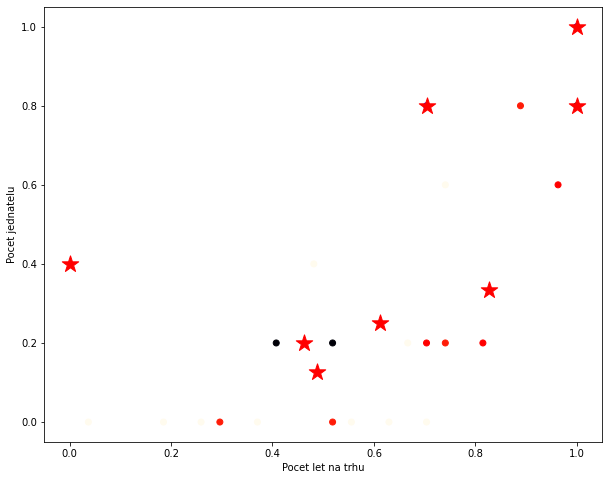

In [75]:
x=1 # Ruzne osi(ruzne sloupce)
y=9 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [77]:
# pridavame cislo clustera k puvodnim datum
df['KMeans']=km.labels_+1
res=df.groupby('KMeans')[col].mean()
res['Pocet']=df.groupby('KMeans').size().values
res

,Soudni spory,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Pocet jednatelu,Pocet
KMeans,,,,,,,,,,,
1,1.0,24.333333,1.333333,6.333333,0.00,1.0,1.333333,405.666667,2.000000,2.666667,3
2,2.0,15.181818,2.000000,3.363636,0.00,1.0,1.000000,56.181818,1.909091,1.636364,11
3,1.0,21.000000,1.000000,38.000000,0.00,1.0,3.000000,10000.000000,1.000000,5.000000,1
4,2.0,14.500000,2.000000,22.500000,1.50,1.0,1.500000,12.000000,2.000000,2.000000,2
5,2.0,18.500000,1.000000,3.500000,0.25,1.0,1.250000,185.250000,2.000000,2.250000,4
6,2.0,2.000000,2.000000,9.000000,0.00,2.0,1.000000,5.000000,2.000000,3.000000,1
7,1.0,29.000000,1.000000,5.000000,1.00,1.0,2.000000,9999.000000,2.000000,6.000000,1
8,1.0,29.000000,1.000000,16.000000,1.00,1.0,1.000000,499.000000,1.000000,5.000000,1


In [40]:
df[df['KMeans']==3] # cilso clustera, na ktery chceme se podivat

,Nazev,Soudni spory,Sidlo,Status,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Dlunzniky,Nespolehlivy platce,Pocet jednatelu,I,KMeans
0,ABL PETROVICE,2,"Petrovice 200 26255, PETROVICE U SEDLČAN",2,13,2,26,2,1,1,19,2,2,2,2,2,3
4,Badec Store s.r.o.,2,"Kuklenská 4396/46 61500, Brno - Židenice",2,2,2,9,0,2,1,5,2,2,2,3,2,3
12,IBG ČESKO,2,"V Pískovně 2053 27801, KRALUPY NAD VLTAVOU",2,10,1,2,0,1,1,199,2,2,2,1,2,3
15,MEGATECHNIK,2,"Tiskařská 49 43401, MOST - VELEBUDICE",2,3,2,4,0,1,1,5,2,2,2,1,2,3
19,MUDr. Blanka Studýnková,2,"Náměstí 15, 691 03 Rakvice",2,9,2,0,0,1,1,5,2,2,2,1,2,3
22,OČNÍ LIBEREC,2,"Dr. Milady Horákové 49/137, Liberec VI-Rochlic...",2,7,2,15,0,1,1,24,2,2,2,1,2,3
23,ADOM,2,"Chrastava, Střelecký vrch 683, PSČ 46331",2,12,2,2,0,1,1,5,2,2,2,1,2,3


In [78]:
df[df['KMeans']==3][['Pocet let na trhu','Pravni forma']]

,Pocet let na trhu,Pravni forma
17,21,3


In [ ]:
# ukladani dat do souboru
df.to_excel('result.xlsx', index=False)